<a href="https://colab.research.google.com/github/claudiobalique/Challenge-Telecom-X-parte2-Public/blob/main/challenge_Telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🛠️ Preparação dos Dados

In [ ]:
import pandas as pd
from io import StringIO

# caminho do arquivo CSV
url = '/content/dados_telecom_x.csv'

# Carregando os dados do CSV do projeto telecom-x parte 1
dados_telecom_x2 = pd.read_csv(url)
# Remover colunas inúteis: customerID e SeniorCitizen_label, GrupoEtario, ChurnStatus e Status_evasao utilizados para implementar gráficos no challenge_telecom_X
dados_telecom_x2.drop(columns=['customerID'], inplace=True)
dados_telecom_x2.drop(columns=['SeniorCitizen_label'], inplace=True)
dados_telecom_x2.drop(columns=['GrupoEtario'], inplace=True)
dados_telecom_x2.drop(columns=['ChurnStatus'], inplace=True)
dados_telecom_x2.drop(columns=['Status_evasao'], inplace=True)
dados_telecom_x2.drop(columns=['Charges.Total'], inplace=True)

# Transformar os atributos gender,InternetService,Contract, PaymentMethod  para string
dados_telecom_x2['gender'] = dados_telecom_x2['gender'].astype('string')
dados_telecom_x2['InternetService'] = dados_telecom_x2['InternetService'].astype('string')
dados_telecom_x2['Contract'] = dados_telecom_x2['Contract'].astype('string')
dados_telecom_x2['PaymentMethod'] = dados_telecom_x2['PaymentMethod'].astype('string')

# Transformar campos boleanos para inteiro
for col in ['SeniorCitizen', 'Churn', 'MultipleLines', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']:
    dados_telecom_x2[col] = dados_telecom_x2[col].astype(int)

# Transformar o atributo tenure  para int
dados_telecom_x2['tenure'] = dados_telecom_x2['tenure'].astype(int)

# Transformar os atributos Charges.Monthly e Charges.Total  para float.

dados_telecom_x2['Charges.Monthly'] = pd.to_numeric(dados_telecom_x2['Charges.Monthly'], errors='coerce')

# Exibindo as primeiras linhas do dataframe
dados_telecom_x2.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6
1,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9
2,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9
3,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0
4,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9


Conhecendo o Dataset
O data set é formado pelos seguintes atributos:

customerID: número de identificação único de cada cliente

Churn: se o cliente deixou ou não a empresa

gender: gênero (masculino e feminino)

SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos

Partner: se o cliente possui ou não um parceiro ou parceira

Dependents: se o cliente possui ou não dependentes

tenure: meses de contrato do cliente

PhoneService: assinatura de serviço telefônico

MultipleLines: assisnatura de mais de uma linha de telefone

InternetService: assinatura de um provedor internet

OnlineSecurity: assinatura adicional de segurança online

OnlineBackup: assinatura adicional de backup online

DeviceProtection: assinatura adicional de proteção no dispositivo

TechSupport: assinatura adicional de suporte técnico, menos tempo de espera

StreamingTV: assinatura de TV a cabo

StreamingMovies: assinatura de streaming de filmes

Contract: tipo de contrato

PaperlessBilling: se o cliente prefere receber online a fatura

PaymentMethod: forma de pagamento

Charges.Monthly: total de todos os serviços do cliente por mês

Charges.Total: total gasto pelo cliente

In [ ]:
# Verificar tipos de dados (object, int, float):
dados_telecom_x2.dtypes
#dados_telecom_x2.to_csv('dados_telecom_x-teste.csv', index=False)

,0
Churn,int64
gender,string[python]
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,string[python]
OnlineSecurity,int64


In [ ]:
# Verificar valores únicos nas colunas categóricas:
colunas_categoricas = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
for col in colunas_categoricas:
    print(f"{col}:\n{dados_telecom_x2[col].unique()}\n")


gender:
<StringArray>
['Female', 'Male']
Length: 2, dtype: string

InternetService:
<StringArray>
['DSL', 'Fiber optic', 'No']
Length: 3, dtype: string

Contract:
<StringArray>
['One year', 'Month-to-month', 'Two year']
Length: 3, dtype: string

PaymentMethod:
<StringArray>
[             'Mailed check',          'Electronic check',
   'Credit card (automatic)', 'Bank transfer (automatic)']
Length: 4, dtype: string



In [ ]:
import pandas as pd
from io import StringIO

# A variável 'dados_telecom_x2' e 'colunas_categoricas'
# devem ser definidas antes de executar este bloco.
# Exemplo:
# dados_telecom_x2 = ...
# colunas_categoricas = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

# Aplicando o One-Hot Encoding corretamente com pd.get_dummies()
# A opção 'drop_first=True' é uma boa prática para evitar multicolinearidade.
df_encoded = pd.get_dummies(dados_telecom_x2, columns=colunas_categoricas, drop_first=True)

# Exibindo o DataFrame após a transformação
print("DataFrame Após One-Hot Encoding:")
print(df_encoded.head())
print("-" * 50)

# Verificando as novas colunas e o formato do DataFrame
print("Novas colunas no DataFrame:")
print(df_encoded.columns)
print("-" * 50)

# Usando o nome correto do DataFrame (dados_telecom_x2) para verificar o formato
print(f"Formato original: {dados_telecom_x2.shape}")
print(f"Formato após a codificação: {df_encoded.shape}")


DataFrame Após One-Hot Encoding:
   Churn  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      0              0        1           1       9             1   
1      0              0        0           0       9             1   
2      1              0        0           0       4             1   
3      1              1        1           0      13             1   
4      1              1        1           0       3             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              1               0             0                 0  ...   
2              0               0             0                 1  ...   
3              0               0             1                 1  ...   
4              0               0             0                 0  ...   

   PaperlessBilling  Charges.Monthly  gender_Male  \
0                 1             65.6        False   
1

In [ ]:
df_encoded.head()


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,Charges.Monthly,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,1,65.6,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,0,59.9,True,False,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,0,1,...,1,73.9,True,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,1,98.0,True,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,1,83.9,False,True,False,False,False,False,False,True


In [ ]:
import pandas as pd
from io import StringIO
# Contar a frequência de cada classe na coluna 'Churn'
churn_counts = df_encoded['Churn'].value_counts()

# Calcular as proporções
total_clientes = len(df_encoded)
proporcoes = churn_counts / total_clientes

# Exibir os resultados
print("Contagem de clientes por classe (0 = Ativo, 1 = Evadido):")
print(churn_counts)
print("\nProporção de clientes por classe:")
print(proporcoes)


# Avaliar o desequilíbrio
# A regra geral é que se uma classe tem menos de 20% das instâncias, é um problema
# de desequilíbrio significativo. Aqui, avaliamos com base nas proporções calculadas.
if proporcoes[1] >= 0.20:  # Quando aproporção de clientes que evadiram é menor que 0,20 indica um desequilíbrio de classes, o que pode afetar a performance do modelos preditivos.
    print("\n✅ As classes parecem estar relativamente equilibradas, o que é favorável para modelos preditivos.")
else:
    print("O modelo  é menor que 0,20 indica desequilíbrio de classes, o que pode afetar a performance do modelos preditivos.")







Contagem de clientes por classe (0 = Ativo, 1 = Evadido):
Churn
0    5398
1    1869
Name: count, dtype: int64

Proporção de clientes por classe:
Churn
0    0.74281
1    0.25719
Name: count, dtype: float64

✅ As classes parecem estar relativamente equilibradas, o que é favorável para modelos preditivos.


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Identificar as colunas numéricas a serem normalizadas
#tenure: meses de contrato do cliente
#Charges.Monthly: total de todos os serviços do cliente por mês
# Após analisar os campos do arquivo achei melhor normalizaros dados, pois a diferença numéricas entre o campo tenure e Charges.Monthly
# podem influenciar o algoritmo a ser construido, pois eles calculam distâncias
# entre os pontos.
colunas_numericas = ['tenure', 'Charges.Monthly']

# Inicializar o normalizador Min-Max
scaler = MinMaxScaler()

# Aplicar o normalizador apenas às colunas selecionadas
# O `.fit_transform()` calcula os valores mínimos e máximos e, em seguida, aplica a escala
df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])

# Exibir as primeiras linhas do DataFrame com os dados normalizados
print("DataFrame com colunas numéricas normalizadas (Min-Max Scaling):")
print(df_encoded[['tenure', 'Charges.Monthly']].head())

DataFrame com colunas numéricas normalizadas (Min-Max Scaling):
     tenure  Charges.Monthly
0  0.125000         0.471144
1  0.125000         0.414428
2  0.055556         0.553731
3  0.180556         0.793532
4  0.041667         0.653234


# 🎯 Correlação e Seleção de Variáveis

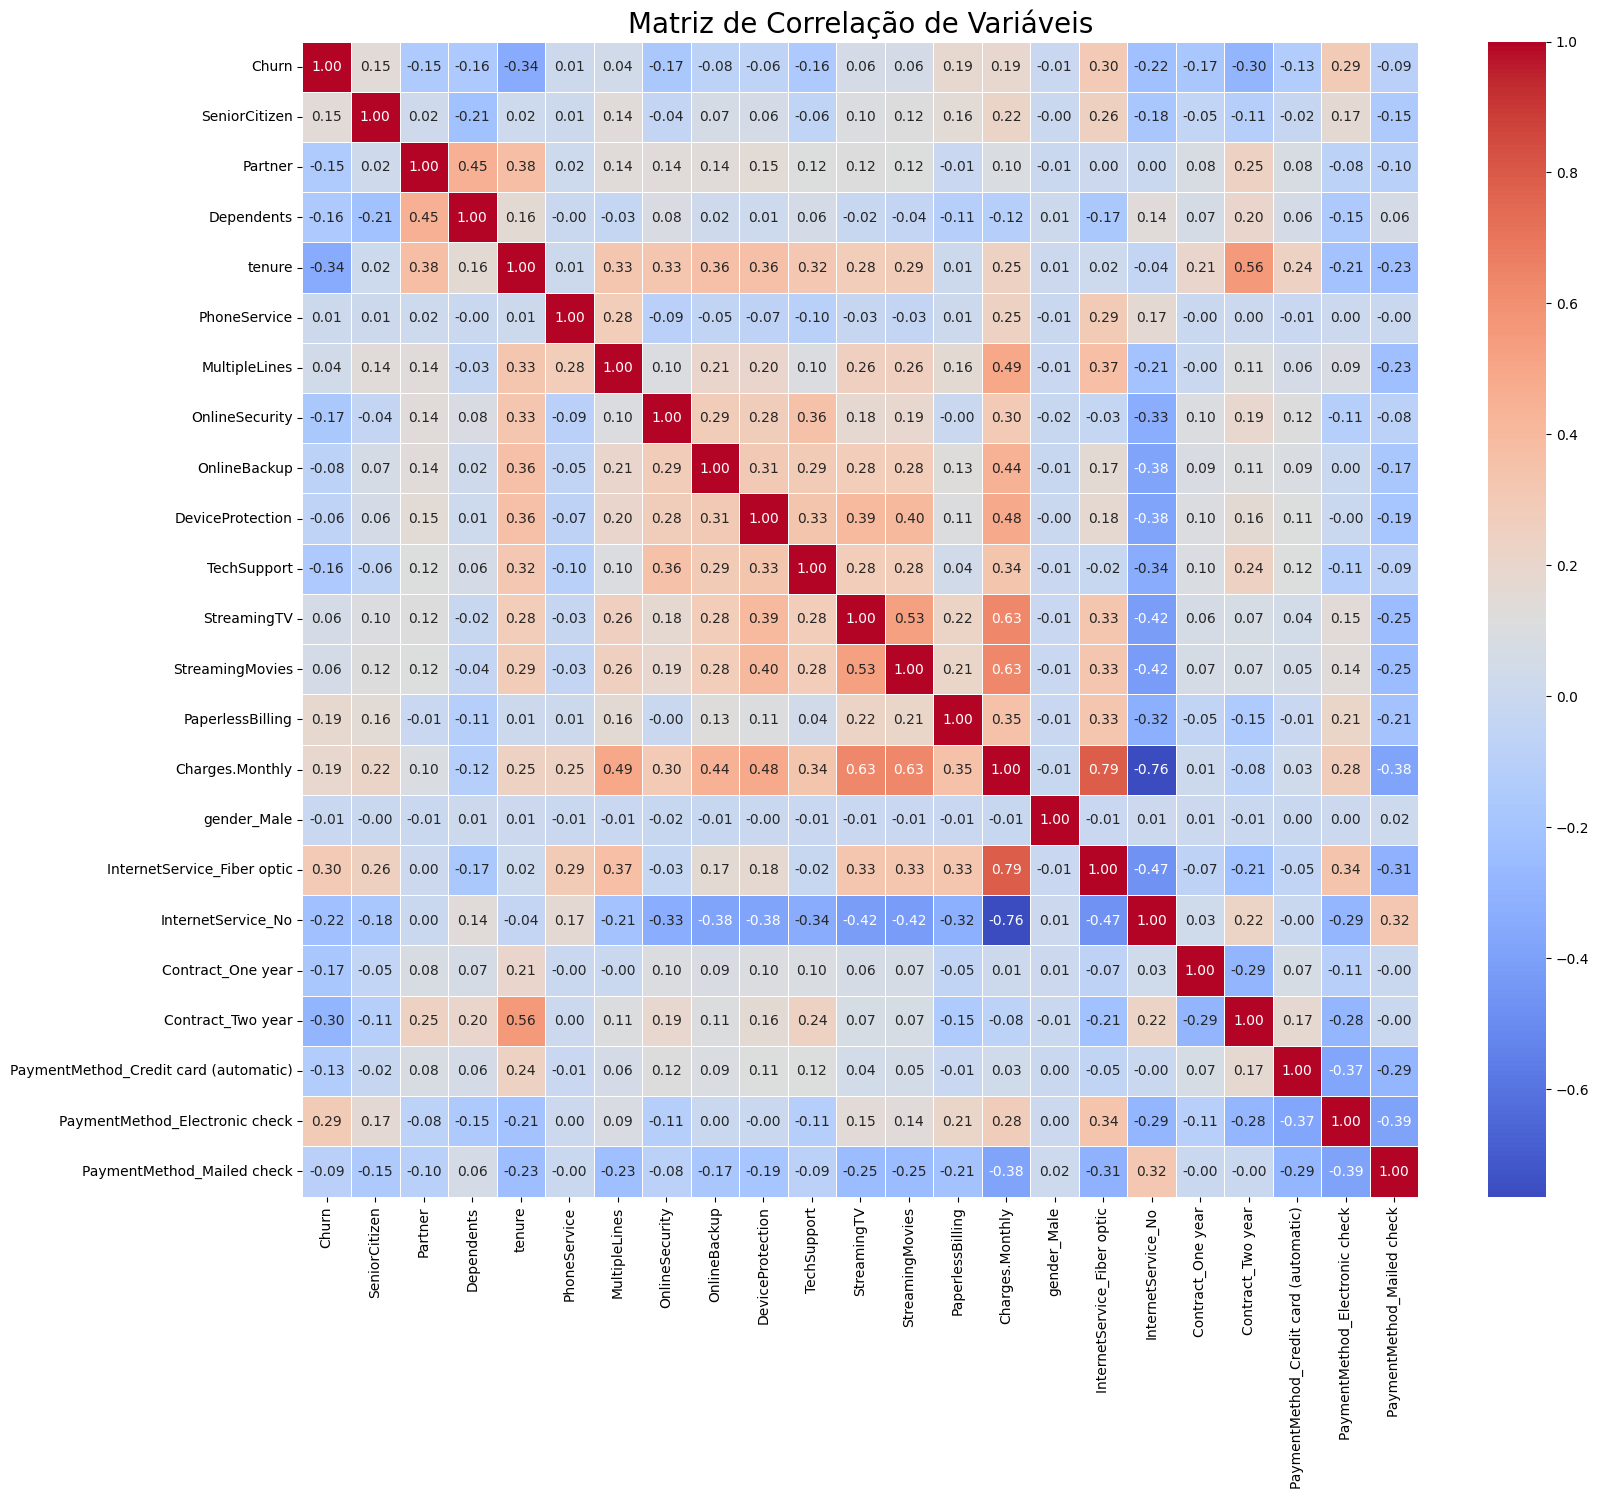


Correlação de cada variável com a evasão (Churn):
Churn                                    1.000000
InternetService_Fiber optic              0.300949
PaymentMethod_Electronic check           0.294626
Charges.Monthly                          0.189866
PaperlessBilling                         0.186666
SeniorCitizen                            0.146733
StreamingTV                              0.062430
StreamingMovies                          0.060586
MultipleLines                            0.039343
PhoneService                             0.012571
gender_Male                             -0.009555
DeviceProtection                        -0.063452
OnlineBackup                            -0.080163
PaymentMethod_Mailed check              -0.090061
PaymentMethod_Credit card (automatic)   -0.131085
Partner                                 -0.148546
TechSupport                             -0.160440
Dependents                              -0.161384
OnlineSecurity                          -0.166828

In [ ]:
#Análise de Correlação
# Essa analise é focada na variável churn.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.preprocessing import MinMaxScaler
# Transformar colunas booleanas em numéricas (0 e 1) para a correlação
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

# Normalizar as colunas numéricas (tenure e Charges.Monthly)
colunas_numericas = ['tenure', 'Charges.Monthly']
scaler = MinMaxScaler()
df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])

# Calcular a matriz de correlação
correlation_matrix = df_encoded.corr()

# Configurar o tamanho do plot
plt.figure(figsize=(18, 15))

# Criar o heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Adicionar título
plt.title('Matriz de Correlação de Variáveis', fontsize=20)

# Exibir o plot
plt.show()

# Opcional: Exibir as correlações com a variável 'Churn' para uma análise mais direta
print("\nCorrelação de cada variável com a evasão (Churn):")
print(correlation_matrix['Churn'].sort_values(ascending=False))

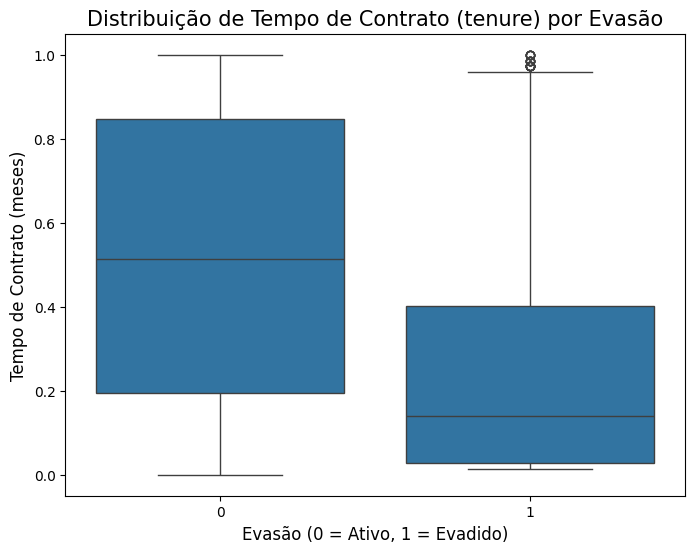

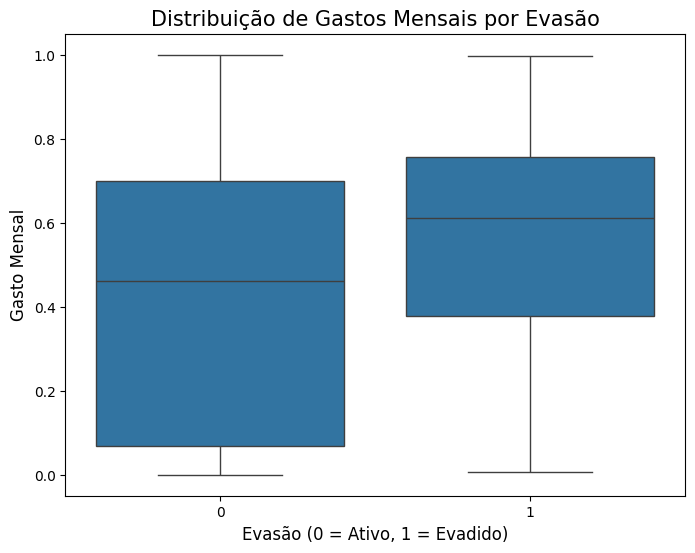

In [ ]:
# Análises Direcionadas
# A escolha do gráfico boxplot é a mais adequada, pois permite
# visualizar a distribuição de das variaveis em estudo, mostrando a
# mediana, quartis e possíveis outliers.
# Isso ajuda a entender se os clientes que evadiram tendem a ter um tempo de
# contrato diferente daqueles que permaneceram no caso da variavel no caso da
# relação Tempo de contrato# (tenure) vs. Evasão. E
# também a comparar a distribuição dos gastos mensais entre os clientes que
# evadiram e os que ficaram no caso da relação Gasto mensal (Charges.Monthly)
# vs. Evasão


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.preprocessing import MinMaxScaler

# Preparar o DataFrame para a visualização, se necessário
# A coluna Churn já está em formato numérico, o que é ideal para a visualização
df_encoded['Churn'] = df_encoded['Churn'].astype(int)

# --- Gráfico de Boxplot para 'tenure' vs. 'Churn' ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df_encoded)
plt.title('Distribuição de Tempo de Contrato (tenure) por Evasão', fontsize=15)
plt.xlabel('Evasão (0 = Ativo, 1 = Evadido)', fontsize=12)
plt.ylabel('Tempo de Contrato (meses)', fontsize=12)
plt.xticks([0, 1])
plt.show()

# --- Gráfico de Boxplot para 'Charges.Monthly' vs. 'Churn' ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_encoded)
plt.title('Distribuição de Gastos Mensais por Evasão', fontsize=15)
plt.xlabel('Evasão (0 = Ativo, 1 = Evadido)', fontsize=12)
plt.ylabel('Gasto Mensal', fontsize=12)
plt.xticks([0, 1])
plt.show()

#🤖 Modelagem Preditiva

#📋  Interpretação e Conclusões